In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/airbnb.csv')

<ipython-input-7-c425b54e4889>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/airbnb.csv')


In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,07-05-19,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Drop column: 'license'
    df = df.drop(columns=['license'])
    # Drop column: 'house_rules'
    df = df.drop(columns=['house_rules'])
    # Replace missing values with the median of each column in: 'availability 365'
    df = df.fillna({'availability 365': df['availability 365'].median()})
    # Replace missing values with the median of each column in: 'availability 365'
    df = df.fillna({'availability 365': df['availability 365'].median()})
    # Replace missing values with the median of each column in: 'calculated host listings count'
    df = df.fillna({'calculated host listings count': df['calculated host listings count'].median()})
    # Replace missing values with the median of each column in: 'review rate number'
    df = df.fillna({'review rate number': df['review rate number'].median()})
    # Replace missing values with the median of each column in: 'reviews per month'
    df = df.fillna({'reviews per month': df['reviews per month'].median()})
    # Replace gaps forward from the previous valid value in: 'last review'
    df = df.fillna({'last review': df['last review'].ffill()})
    # Replace missing values with the median of each column in: 'minimum nights'
    df = df.fillna({'minimum nights': df['minimum nights'].median()})
    # Replace gaps forward from the previous valid value in: 'Construction year'
    df = df.fillna({'Construction year': df['Construction year'].ffill()})
    # Replace missing values with the most common value of each column in: 'cancellation_policy'
    df = df.fillna({'cancellation_policy': df['cancellation_policy'].mode()[0]})
    # Replace missing values with the most common value of each column in: 'country code'
    df = df.fillna({'country code': df['country code'].mode()[0]})
    # Drop column: 'country code'
    df = df.drop(columns=['country code'])
    # Replace missing values with the most common value of each column in: 'country'
    df = df.fillna({'country': df['country'].mode()[0]})
    # Drop rows with missing data in column: 'long'
    df = df.dropna(subset=['long'])
    # Drop rows with missing data in column: 'neighbourhood'
    df = df.dropna(subset=['neighbourhood'])
    # Drop rows with missing data in column: 'neighbourhood group'
    df = df.dropna(subset=['neighbourhood group'])
    # Drop rows with missing data in column: 'host name'
    df = df.dropna(subset=['host name'])
    # Drop rows with missing data in column: 'host_identity_verified'
    df = df.dropna(subset=['host_identity_verified'])
    # Drop rows with missing data in column: 'NAME'
    df = df.dropna(subset=['NAME'])
    # Drop rows with missing data in column: 'instant_bookable'
    df = df.dropna(subset=['instant_bookable'])
    # Derive column 'service_fee_edited' from column: 'service fee'
    # Transform based on the following examples:
    #    service fee    Output
    # 1: "$193 "     => "193"
    df.insert(16, "service_fee_edited", df["service fee"].str.split("$").str[-1].str.strip())
    # Change column type to float16 for column: 'service_fee_edited'
    df = df.astype({'service_fee_edited': 'float16'})
    # Replace missing values with the median of each column in: 'service_fee_edited'
    df = df.fillna({'service_fee_edited': df['service_fee_edited'].median()})
    # Drop column: 'service fee'
    df = df.drop(columns=['service fee'])
    # Derive column 'price_edited' from column: 'price'
    # Transform based on the following examples:
    #    price      Output
    # 1: "$966 " => "966"
    # 2: "$142 " => "142"
    df.insert(15, "price_edited", df["price"].str.split("$").str[-1].str.strip())
    # Drop column: 'price'
    df = df.drop(columns=['price'])
    df['price_edited'] = df['price_edited'].str.replace(',', '').astype(float)
    # Replace missing values with the median of each column in: 'price_edited'
    df = df.fillna({'price_edited': df['price_edited'].median()})
    # Rename column 'availability 365' to 'availability_365'
    df = df.rename(columns={'availability 365': 'availability_365'})
    df = df[df['availability_365'] <= 600]
    # Rename column 'minimum nights' to 'minimum_nights'
    df = df.rename(columns={'minimum nights': 'minimum_nights'})
    df = df[df['minimum_nights'] >= 0]
    df = df[df['minimum_nights'] <= 6]
    df = df[df['number of reviews']<=36 ]
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_edited,service_fee_edited,minimum_nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability_365
39,1022876,Country space in the city,49725315867,verified,Deanna,Brooklyn,Flatbush,40.63702,-73.96327,United States,...,2011.0,1020.0,204.0,1.0,0.0,6/22/2019,0.73,3.0,1.0,356.0
42,1024533,Beautiful Sunny Park Slope Brooklyn,50357575975,verified,Alina,Brooklyn,South Slope,40.66278,-73.97966,United States,...,2020.0,370.0,74.0,3.0,15.0,5/27/2019,0.39,2.0,1.0,33.0
49,1028399,bright and stylish duplex,53466382920,verified,Chloe,Brooklyn,Bedford-Stuyvesant,40.68554,-73.94090,United States,...,2015.0,363.0,73.0,3.0,11.0,01-01-17,0.10,1.0,1.0,85.0
55,1031713,Beautiful Apartment in Manhattan!!!,39829029279,verified,Richard,Manhattan,Kips Bay,40.73961,-73.98074,United States,...,2017.0,903.0,181.0,3.0,19.0,3/25/2019,0.22,5.0,1.0,110.0
67,1038340,Light-filled 2B duplex in the heart of Park Sl...,42969787263,verified,Ellia,Brooklyn,Park Slope,40.67343,-73.98338,United States,...,2006.0,1037.0,207.0,3.0,4.0,9/24/2017,0.16,3.0,1.0,110.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

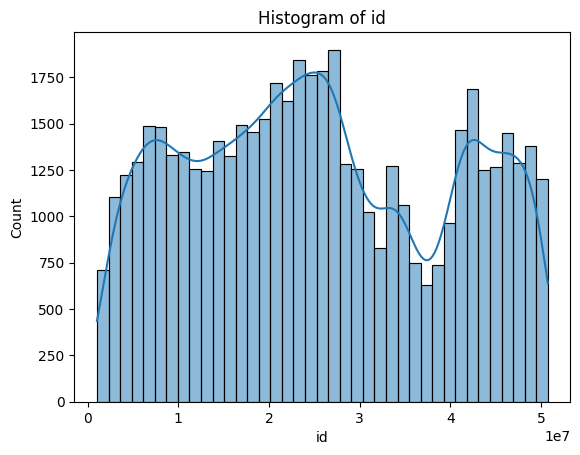

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22661 (\N{CJK UNIFIED IDEOGRAPH-5885}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

ValueError: 
Dominiq's NY cosy 3bedrm crashpad*metro*wifi*$$ale
                                             ^
ParseException: Expected end of text, found '$'  (at char 45), (line:1, col:46)

<Figure size 640x480 with 1 Axes>

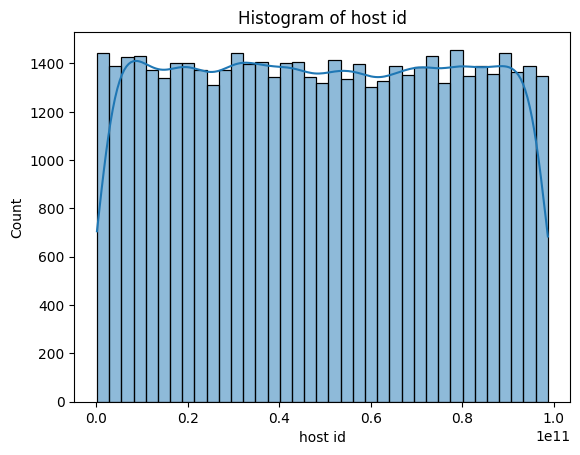

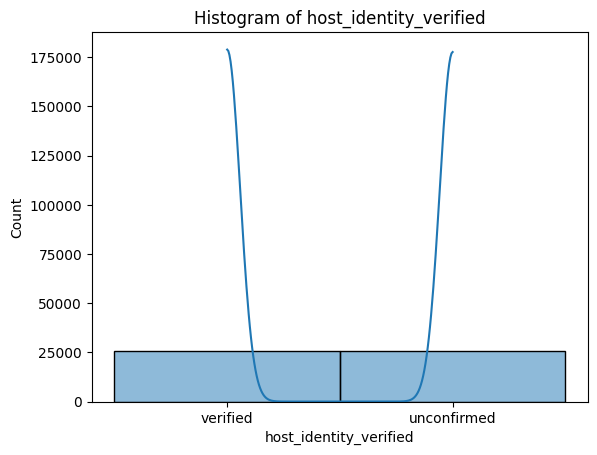

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31435 (\N{CJK UNIFIED IDEOGRAPH-7ACB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23041 (\N{CJK UNIFIED IDEOGRAPH-5A01}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21367 (\N{CJK UNIFIED IDEOGRAPH-5377}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22958 (\N{CJK UNIFIED IDEOGRAPH-59AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

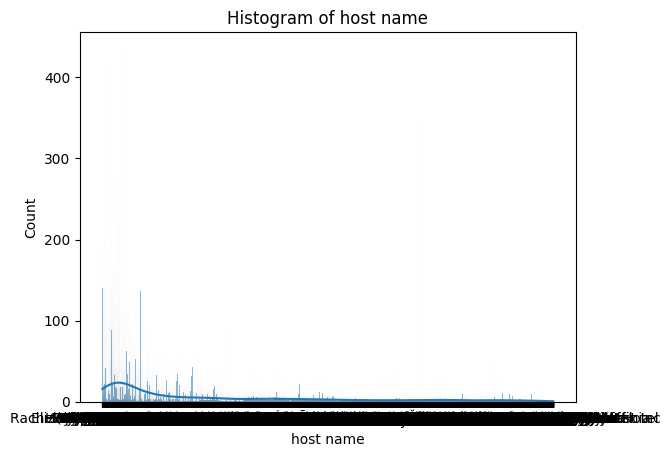

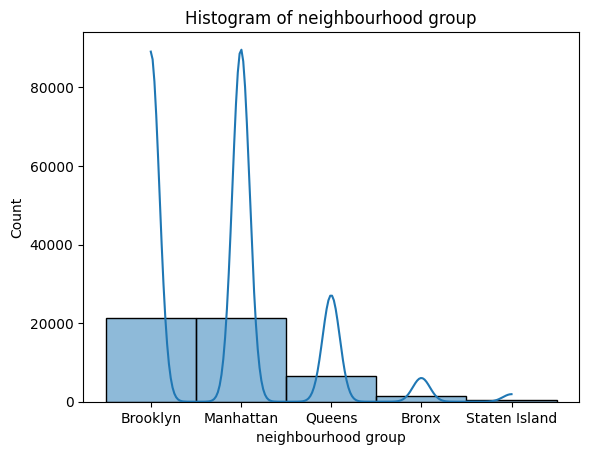

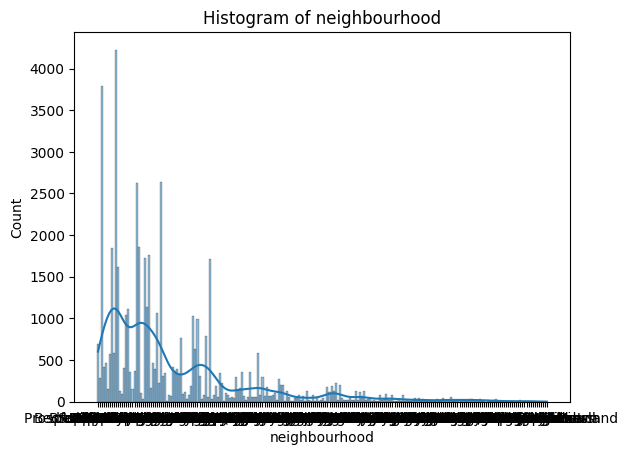

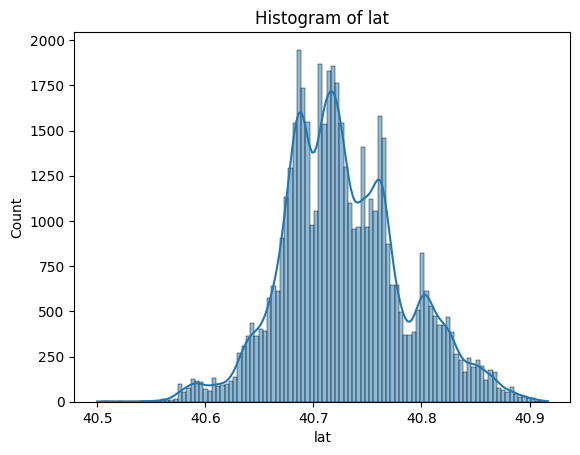

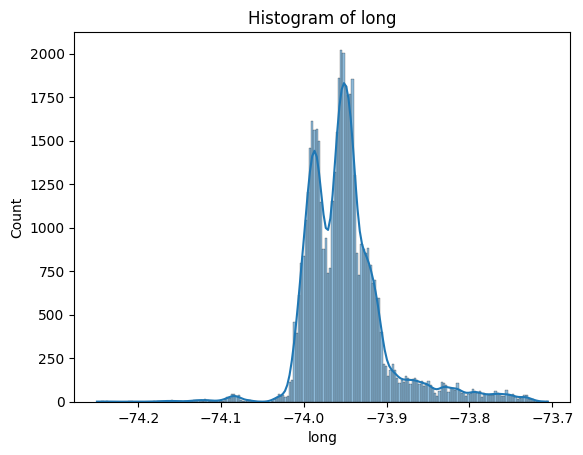

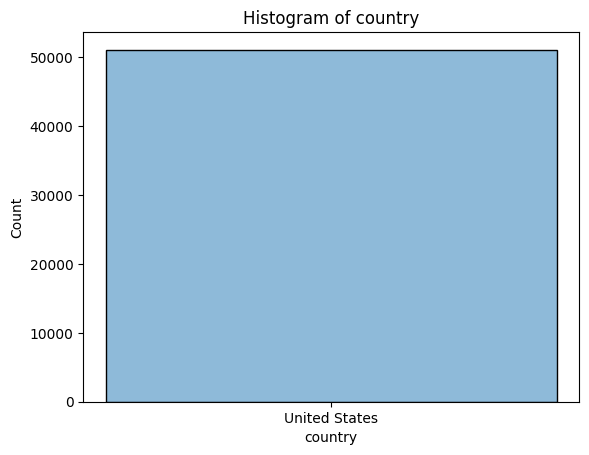

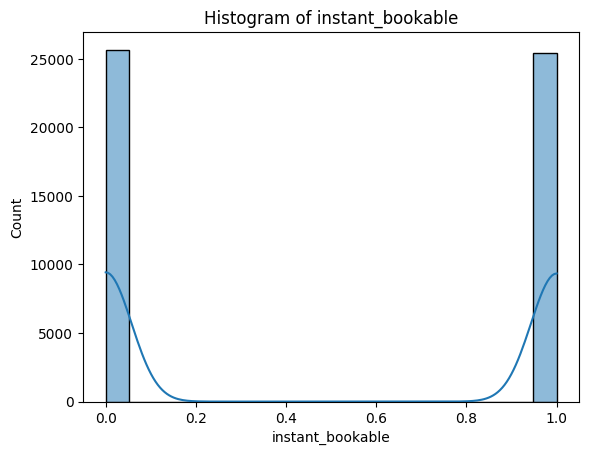

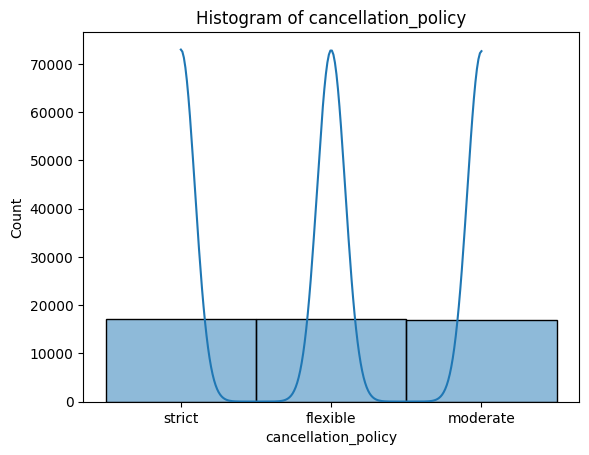

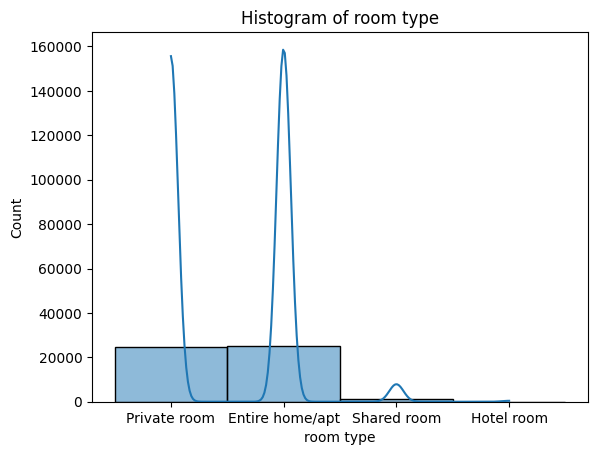

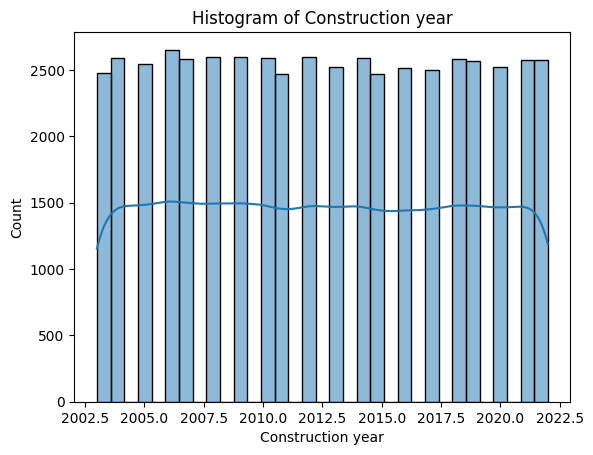

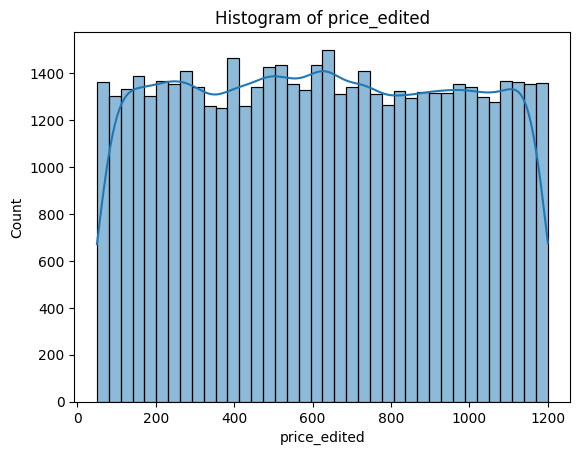

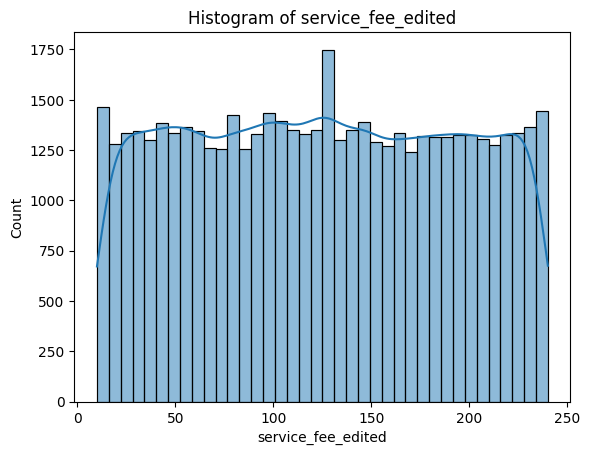

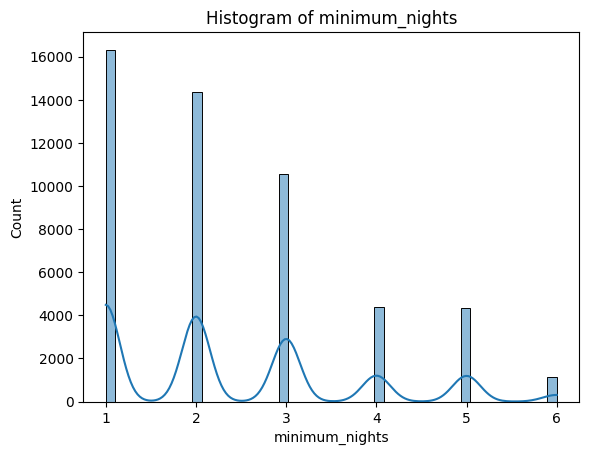

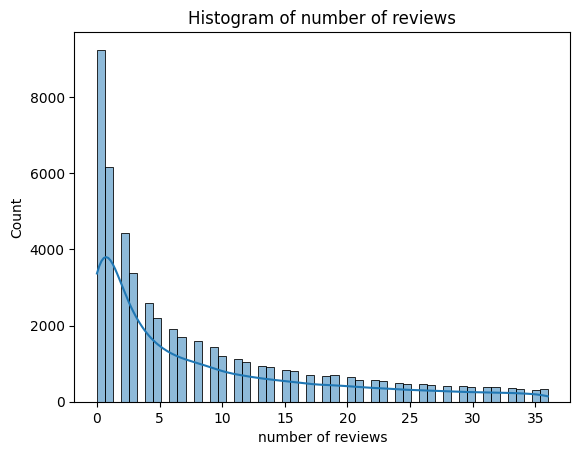

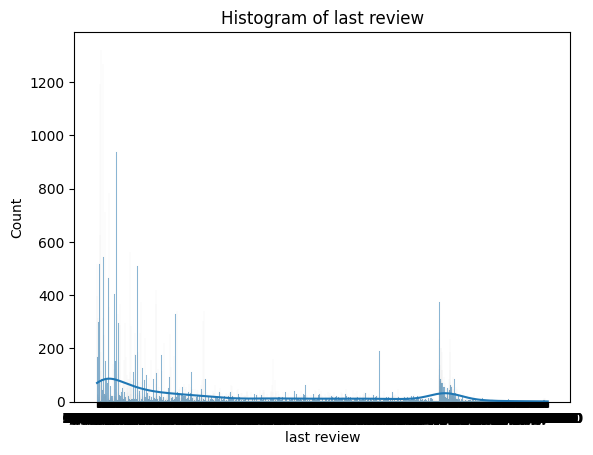

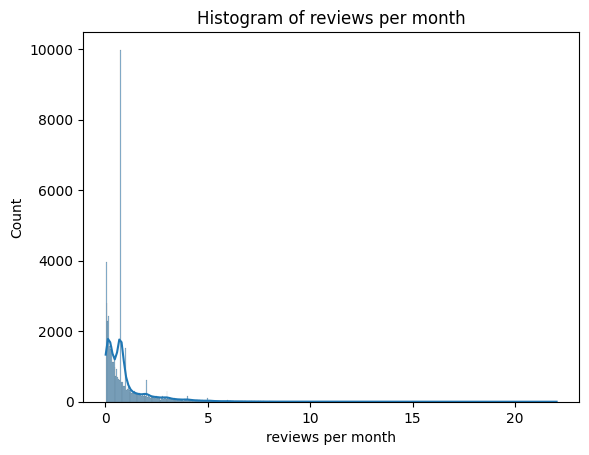

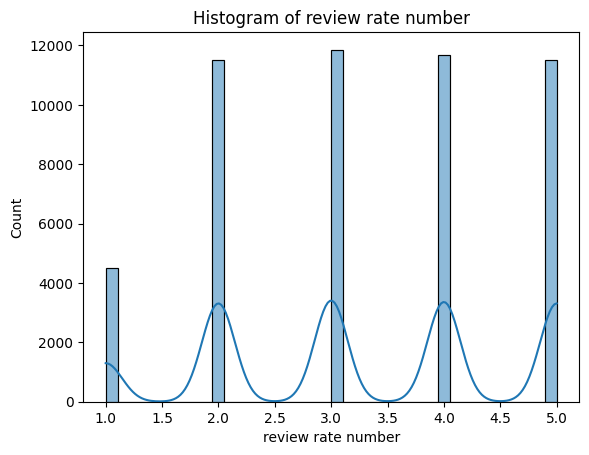

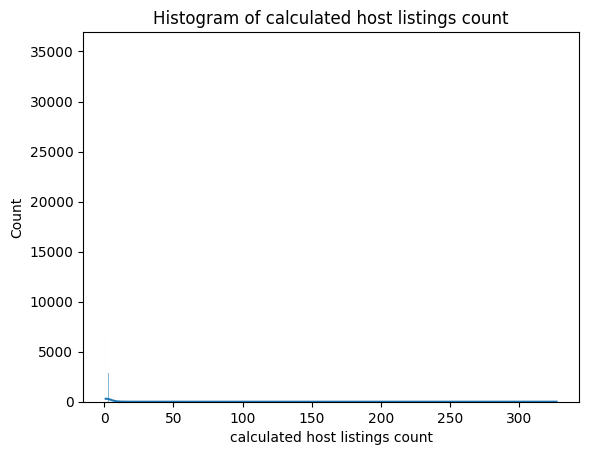

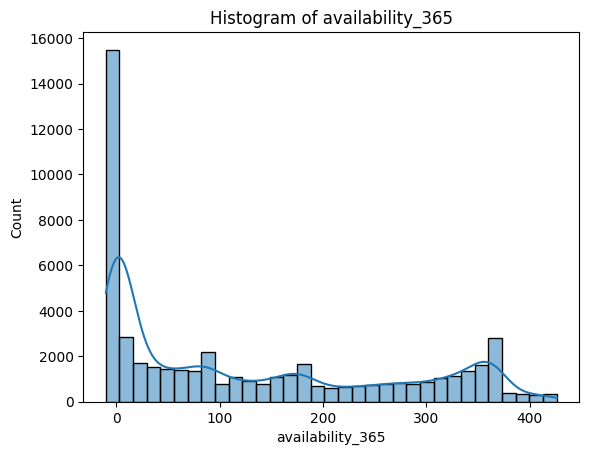

In [ ]:
# prompt: plot graphs for all the columns

import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through each column in the DataFrame
for column in df_clean.columns:
    # Create a figure
    plt.figure()
    # Plot the histogram of the current column
    sns.histplot(x=column, data=df_clean, kde=True)
    # Set the title of the plot
    plt.title(f"Histogram of {column}")
    # Show the plot
    plt.show()
